# MARKETING Y COMUNICACIÓN

## ANÁLISIS DE NEGOCIO

### SPRINT N°1
* Fecha de inicio: 25/11/2024
* Fecha de presentación: 2/12/2024

**OBJETIVOS**
1) ¿Cómo afecta la duración de las llamadas de contacto a la probabilidad de que un cliente suscriba a un depósito a plazo?
2) ¿Qué ajustes podríamos hacer en nuestros métodos de contacto para mejorar la tasa de respuesta?

#### LIBRERIAS

In [1]:
import pymysql
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

#### DATAFRAME: df_BANK_marketing

In [2]:
df_BANK_marketing = pd.read_parquet('df_BANK_marketing.parquet')
df_BANK_marketing.sample(10)

,id,age,job,marital,education,is_in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
899,900,51.0,entrepreneur,married,tertiary,0,5254,1,0,unknown,23,oct,134,1,-1,0,unknown,1
1315,1316,46.0,management,married,tertiary,0,0,0,0,cellular,3,mar,305,13,-1,0,unknown,1
2371,2372,27.0,services,single,secondary,0,302,0,0,cellular,3,jul,203,1,-1,0,unknown,1
10485,10486,51.0,technician,married,secondary,0,2682,0,0,unknown,18,jun,56,1,-1,0,unknown,0
7972,7973,42.0,admin.,divorced,secondary,0,0,1,0,unknown,7,may,229,2,-1,0,unknown,0
8077,8078,34.0,services,married,primary,0,31,0,1,cellular,9,jul,53,3,-1,0,unknown,0
2710,2711,83.0,retired,married,primary,0,425,0,0,telephone,22,sep,773,1,92,2,success,1
1972,1973,34.0,management,married,tertiary,0,273,1,0,cellular,14,may,492,1,175,2,failure,1
10982,10983,32.0,admin.,married,secondary,0,3540,1,0,cellular,18,may,213,1,178,1,failure,0
10807,10808,47.0,blue-collar,married,secondary,0,3237,1,0,unknown,15,may,198,3,-1,0,unknown,0


#### DISPERSIÓN DE LA DURACIÓN DE LAS LLAMADAS

Para comenzar con el análisis de como afecta la duración de las llamadas (en segundos) a la probabilidad de que un cliente suscriba a un depósito a plazo, observaremos la dispersión total de las llamadas y como se posicionan respecto a los cuartiles. 

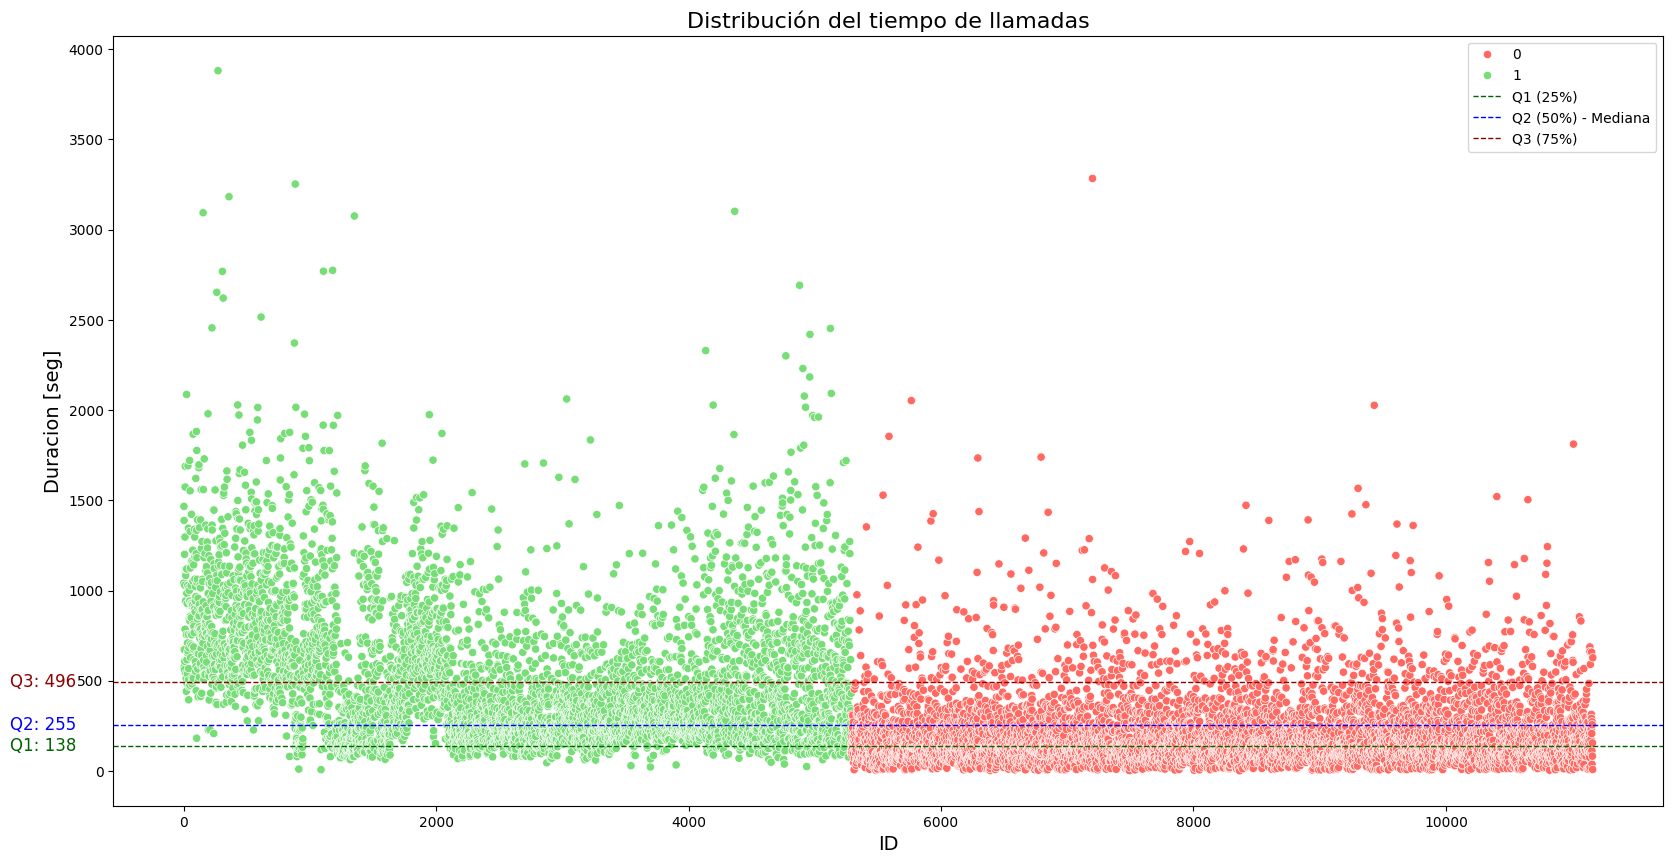

In [3]:
#Cálculo de los cuartiles de 'duration'
Q1 = df_BANK_marketing['duration'].quantile(0.25)
Q2 = df_BANK_marketing['duration'].quantile(0.50)  #Mediana
Q3 = df_BANK_marketing['duration'].quantile(0.75)

#Ajuste de tamaño del gráfico
plt.figure(figsize=(20, 10))

#Scatter con 'duration', 'id' y filtrado por la contratación o no del depósito (1 = si, 0 = no)
sns.scatterplot(
    x='id', 
    y='duration', 
    hue='deposit', 
    data=df_BANK_marketing, 
    palette={1: '#77dd77', 0: '#ff6961'}  #'1' = Verde | '0' = Rojo
)

#Representación de cuartiles en eje X
plt.axhline(Q1, color='#006400', linestyle='--', linewidth=1, label='Q1 (25%)')  #Verde oscuro = #006400
plt.axhline(Q2, color='blue', linestyle='--', linewidth=1, label='Q2 (50%) - Mediana')
plt.axhline(Q3, color='#8B0000', linestyle='--', linewidth=1, label='Q3 (75%)')  #Rojo oscuro = #8B0000

#Ajuste de los valores de los cuartiles por fuera del gráfico
x_offset = df_BANK_marketing['id'].min() - 850  # '850' es el offset
plt.text(x_offset, Q1, f'Q1: {Q1:.0f}', color='#006400', fontsize=12, va='center', ha='right')  #Verde oscuro = #006400
plt.text(x_offset, Q2, f'Q2: {Q2:.0f}', color='blue', fontsize=12, va='center', ha='right')
plt.text(x_offset, Q3, f'Q3: {Q3:.0f}', color='#8B0000', fontsize=12, va='center', ha='right')  #Rojo oscuro = #8B0000


#Título, ejes y leyenda
plt.title('Distribución del tiempo de llamadas', fontsize=16)
plt.xlabel('ID', fontsize=14)
plt.ylabel('Duracion [seg]', fontsize=14)
plt.legend()

plt.show()


Dada la cantidad de registros, no se puede apreciar bien la cantidad de registros en cada cuartil, por lo que procedemos a graficar un boxplot e intentar aclarar aún más estos valores.

In [4]:
df_BANK_marketing.groupby('deposit')['duration'].describe().round()

,count,mean,std,min,25%,50%,75%,max
deposit,,,,,,,,
0,5873.0,223.0,209.0,2.0,94.0,163.0,282.0,3284.0
1,5290.0,537.0,393.0,8.0,244.0,426.0,725.0,3881.0


<Figure size 2000x1000 with 0 Axes>

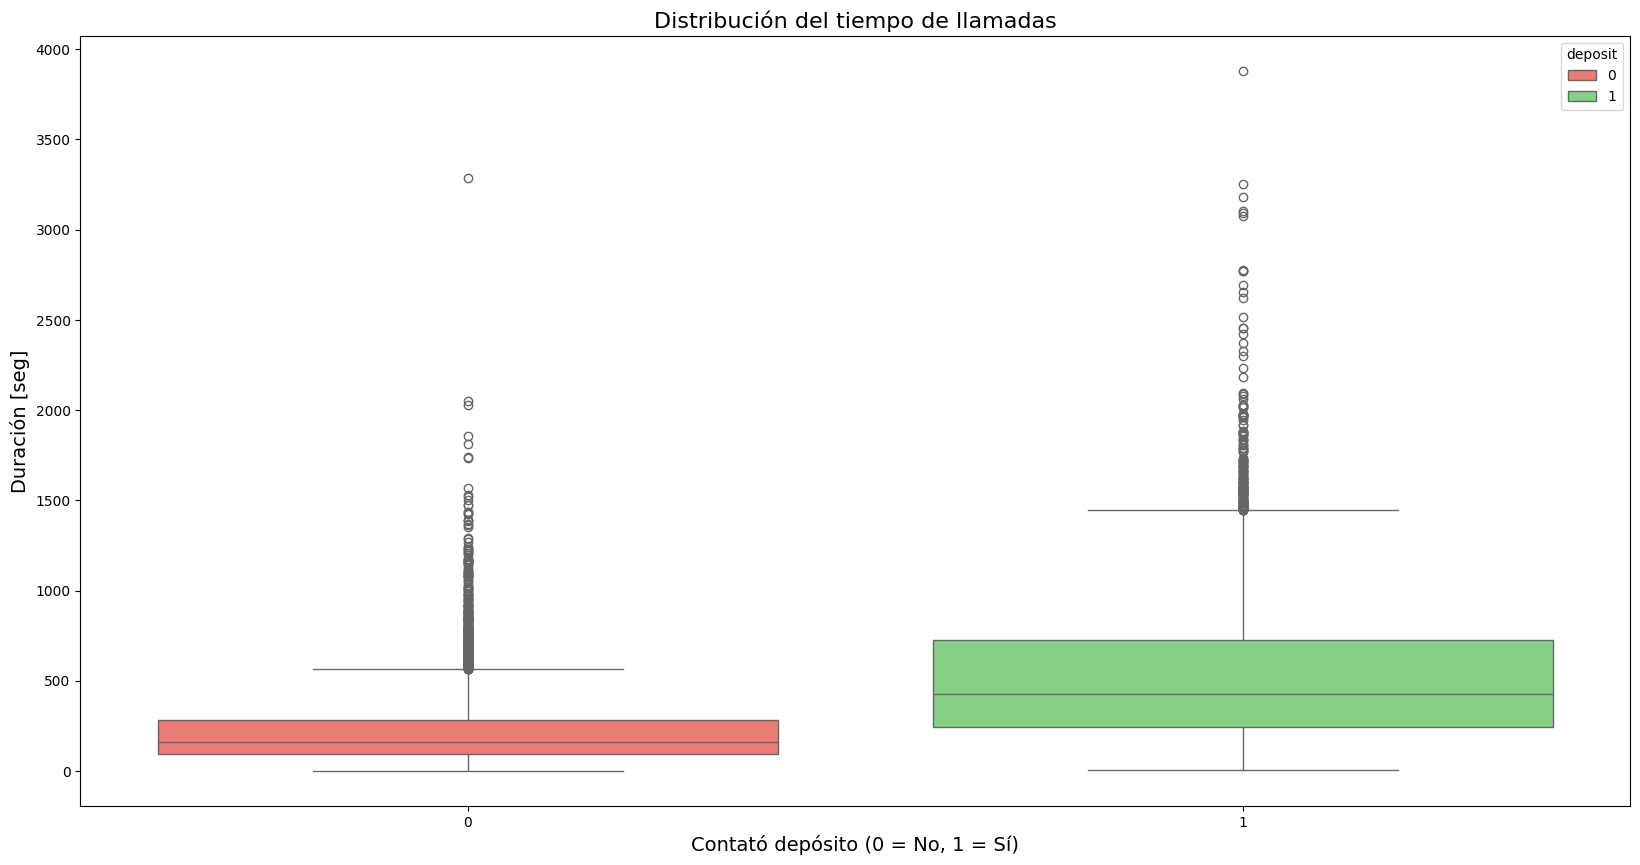

In [5]:
plt.figure(figsize=(20, 10))

plt.figure(figsize=(20, 10))
sns.boxplot(
    x='deposit', 
    y='duration', 
    data=df_BANK_marketing, 
    hue='deposit',  #Solamente para que se le asigne un color
    palette={1: '#77dd77', 0: '#ff6961'},  #'1' = Verde | '0' = Rojo
)

#Título, ejes y leyenda
plt.title('Distribución del tiempo de llamadas', fontsize=16)
plt.xlabel('Contató depósito (0 = No, 1 = Sí)', fontsize=14)
plt.ylabel('Duración [seg]', fontsize=14)
plt.show()

In [6]:
df_BANK_marketing.groupby('deposit')['duration'].describe().round()


,count,mean,std,min,25%,50%,75%,max
deposit,,,,,,,,
0,5873.0,223.0,209.0,2.0,94.0,163.0,282.0,3284.0
1,5290.0,537.0,393.0,8.0,244.0,426.0,725.0,3881.0


En el boxplot, se observa como incrementa la mediana con respecto a lo clientes que contrataron el depósito (426 segundos) versus los que no (163 segundos).
También los cuartiles parecen tener más sentido con respecto a una llamada telefónico, la mayor cantidad de valores se encuentra entre los quartiles de 244 a 725 segundos, 

#### TASA DE ÉXITO SEGÚN EL TIPO DE CONTACTO

In [7]:
#'deposit' == 1 (Contrató depósito) - success
success_contacts = df_BANK_marketing[df_BANK_marketing['deposit'] == 1]

#'deposit' == 0 (No contrató depósito) - unsuccess
unsuccess_contacts = df_BANK_marketing[df_BANK_marketing['deposit'] == 0]

#Count total de contactos
total_count = df_BANK_marketing.groupby('contact')['deposit'].count()

#Count de success 
success_count = success_contacts.groupby('contact')['deposit'].count()

#Count de unsuccess 
unsuccess_count = unsuccess_contacts.groupby('contact')['deposit'].count()

#df con el total de contactos, success y unsuccess
contact_analysis = pd.DataFrame({
    'Total contactados': total_count,
    'Contactos exitosos': success_count,
    'Contactos no exitosos': unsuccess_count
})

#Tasa de éxito: success / total de contactos
contact_analysis['Tasa de éxito (%)'] = round((contact_analysis['Contactos exitosos'] / contact_analysis['Total contactados']) * 100,2)

#Tasa de no éxito: unsuccess / total de contactos
contact_analysis['Tasa de no éxito (%)'] = round((contact_analysis['Contactos no exitosos'] / contact_analysis['Total contactados']) * 100,2)

contact_analysis

,Total contactados,Contactos exitosos,Contactos no exitosos,Tasa de éxito (%),Tasa de no éxito (%)
contact,,,,,
cellular,8042,4369,3673,54.33,45.67
telephone,774,390,384,50.39,49.61
unknown,2347,531,1816,22.62,77.38


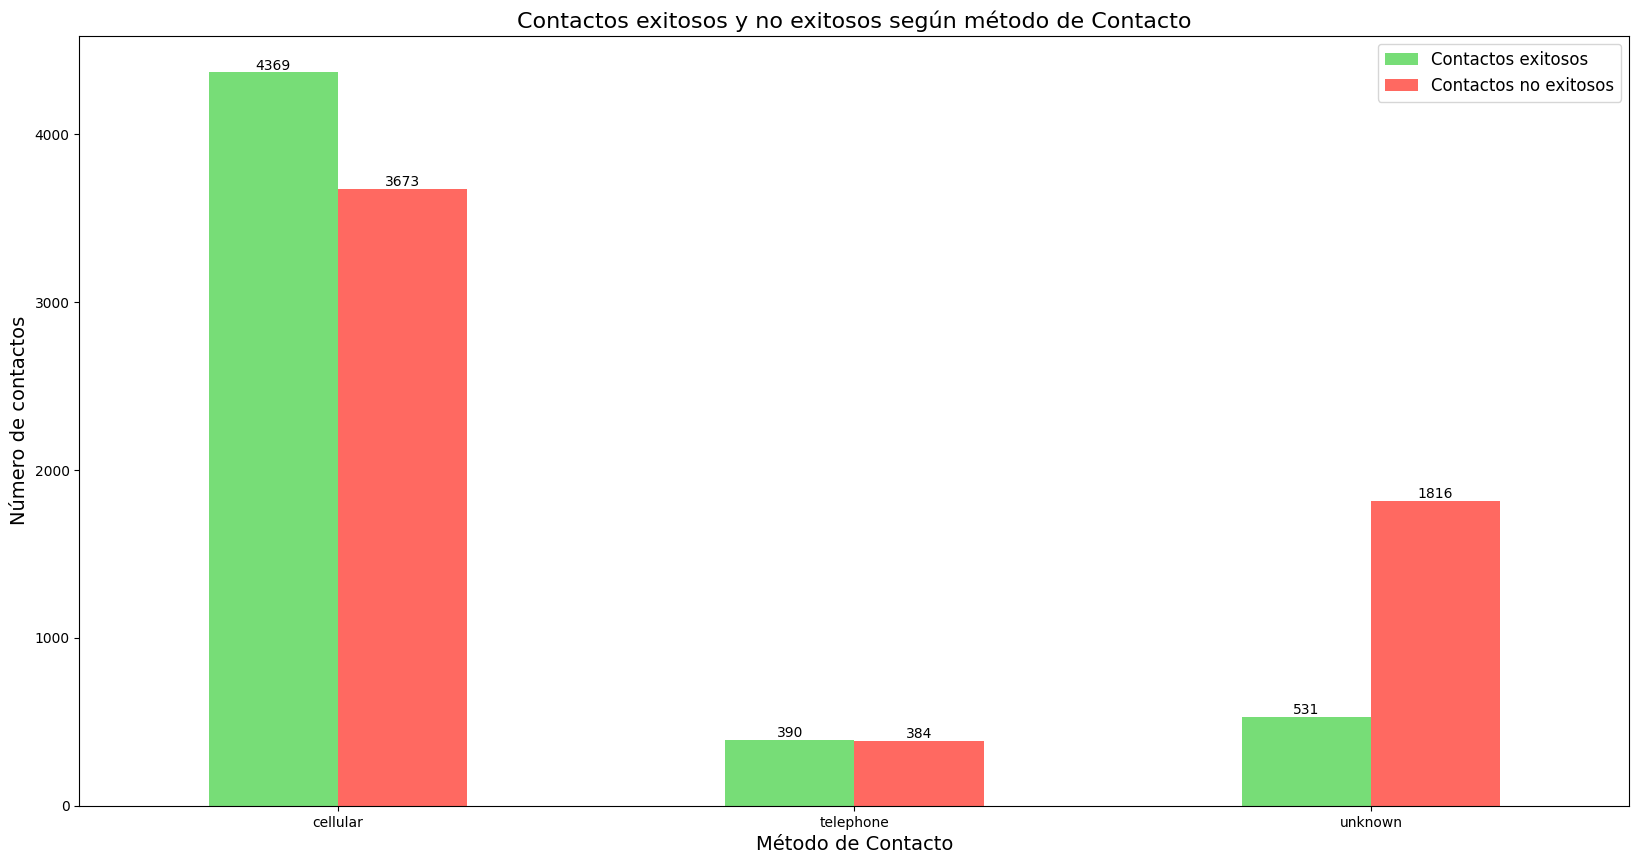

In [8]:
ax = contact_analysis[['Contactos exitosos', 'Contactos no exitosos']].plot(
    kind='bar', 
    stacked=False, 
    figsize=(20, 10),
    color=['#77dd77', '#ff6961']  #Colores verde (Contactos Exitosos) y rojo (Contactos No exitosos)
)

plt.title('Contactos exitosos y no exitosos según método de Contacto', fontsize=16)
plt.xlabel('Método de Contacto', fontsize=14)
plt.ylabel('Número de contactos', fontsize=14)
plt.xticks(rotation=0)
plt.legend(fontsize=12)

#Valores sobre barra
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,  #Centrado en la barra
            height,  #Encima de la barra
            f'{int(height)}',  #Valor a mostrar
            ha='center', 
            va='bottom', 
            fontsize=10
        )

plt.show()

* La mayoría de los clientes contactados fue a través de su movil, siendo un 54.33% la tasa de éxito. 
* Hay una gran diferencia de llamados hacia teléfonos fijos, los cuales un 50.39% aceptó la contratación del depósito.
* En un nivel intermedio tenemos los contactos que no se identificó el medio, con una tasa muy baja de éxito del 22.62%


#### DATAFRAME df_BANK_marketing CON COLUMNAS 'id','contact','campaign','previous','deposit','duration'

In [9]:
df_BANK_marketing = df_BANK_marketing[['id','contact','campaign','previous','deposit','duration']]
df_BANK_marketing.head(10)

,id,contact,campaign,previous,deposit,duration
0,1,unknown,1,0,1,1042
1,2,unknown,1,0,1,1042
2,3,unknown,1,0,1,1467
3,4,unknown,1,0,1,1389
4,5,unknown,1,0,1,579
5,6,unknown,2,0,1,673
6,7,unknown,2,0,1,562
7,8,unknown,1,0,1,1201
8,9,unknown,1,0,1,1030
9,10,unknown,1,0,1,608


#### COLUMNA DURATION (MIN)

In [10]:
df_BANK_marketing['duration_min'] = df_BANK_marketing['duration'] / 60
df_BANK_marketing

,id,contact,campaign,previous,deposit,duration,duration_min
0,1,unknown,1,0,1,1042,17.366667
1,2,unknown,1,0,1,1042,17.366667
2,3,unknown,1,0,1,1467,24.450000
3,4,unknown,1,0,1,1389,23.150000
4,5,unknown,1,0,1,579,9.650000
...,...,...,...,...,...,...,...
11158,11159,cellular,1,0,0,257,4.283333
11159,11160,unknown,4,0,0,83,1.383333
11160,11161,cellular,2,0,0,156,2.600000
11161,11162,cellular,2,5,0,9,0.150000


#### COLUMNA DURATION (RANGE) INTERVALOS DE 5'

In [11]:
def assign_duration_range(duration):
    if 0 <= duration < 5:
        return "00'- 05'"
    elif 5 <= duration < 10:
        return "05'- 10'"
    elif 10 <= duration < 15:
        return "10'- 15'"
    elif 15 <= duration < 20:
        return "15'- 20'"
    elif 20 <= duration < 25:
        return "20'- 25'"
    elif 25 <= duration < 30:
        return "25'- 30'"
    elif 30 <= duration < 35:
        return "30'- 35'"
    elif 35 <= duration < 40:
        return "35'- 40'"
    elif 40 <= duration < 45:
        return "40'- 45'"
    elif 45 <= duration < 50:
        return "45'- 50'"
    elif 50 <= duration < 55:
        return "50'- 55'"
    elif 55 <= duration <= 60:
        return "55'- 60'"
    else:
        return "Fuera de rango"

#Creo una nueva columna 'duration_min_range' aplicando al función 
df_BANK_marketing['duration_min_range'] = df_BANK_marketing['duration_min'].apply(assign_duration_range)
df_BANK_marketing


,id,contact,campaign,previous,deposit,duration,duration_min,duration_min_range
0,1,unknown,1,0,1,1042,17.366667,15'- 20'
1,2,unknown,1,0,1,1042,17.366667,15'- 20'
2,3,unknown,1,0,1,1467,24.450000,20'- 25'
3,4,unknown,1,0,1,1389,23.150000,20'- 25'
4,5,unknown,1,0,1,579,9.650000,05'- 10'
...,...,...,...,...,...,...,...,...
11158,11159,cellular,1,0,0,257,4.283333,00'- 05'
11159,11160,unknown,4,0,0,83,1.383333,00'- 05'
11160,11161,cellular,2,0,0,156,2.600000,00'- 05'
11161,11162,cellular,2,5,0,9,0.150000,00'- 05'


#### FILTRO 'unknown' DE 'contact' -> Pierdo 2347 registros

In [12]:
df_BANK_marketing_contact = df_BANK_marketing[df_BANK_marketing['contact'] != 'unknown']
total_poblacion_sin_unknown = df_BANK_marketing_contact['id'].count()
total_poblacion_sin_unknown

8816

#### PORCENTAJE DE LA POBLACIÓN 'Contact' SIN 'unknown'

In [13]:
poblacion = round(df_BANK_marketing_contact['id'].count() / df_BANK_marketing['id'].count() * 100,2)
print(f"{poblacion} %")

78.98 %


#### TOTAL DE CLIENTES QUE CONTRATARON POR 'telephone' y 'cellular'

In [14]:
#Total de clientes que contrataron (telephone & cellular)
total_contrató = df_BANK_marketing_contact[df_BANK_marketing_contact['deposit'] == 1]['id'].count()
total_contrató

4759

#### RESUMEN DE 'duration_min_range' CON 'deposit' = 1 Y 'contact' = cellular

In [15]:
#Filtro por deposit = 1 y contact = 'cellular'
df_BANK_marketing_contact_cellular = df_BANK_marketing_contact[
    (df_BANK_marketing_contact['deposit'] == 1) &
    (df_BANK_marketing_contact['contact'] == 'cellular')
]

#Agrupo por duration_min_range y cuento los id
result_cellular = df_BANK_marketing_contact_cellular.groupby('duration_min_range')['id'].count().reset_index()

#Renombro la columna 'duration_min_range' por 'Duración de llamada' | '.count(id)' por 'Contrató'
result_cellular.columns = ['Duración de llamada', 'Contrató']

#Agrego columna de % de conversión (exitosos por 'cellular') / total de la población (sin 'unknown')
result_cellular['% Conversión (sin unknown)'] = round((result_cellular['Contrató'] / total_poblacion_sin_unknown) * 100,2)

result_cellular

,Duración de llamada,Contrató,% Conversión (sin unknown)
0,00'- 05',1626,18.44
1,05'- 10',1378,15.63
2,10'- 15',777,8.81
3,15'- 20',355,4.03
4,20'- 25',148,1.68
5,25'- 30',54,0.61
6,30'- 35',21,0.24
7,35'- 40',3,0.03
8,40'- 45',3,0.03
9,45'- 50',2,0.02


#### RESUMEN DE 'duration_min_range' CON 'deposit' = 1 Y 'contact' = telephone

In [16]:
#Filtro por deposit = 1 y contact = 'telephone'
df_BANK_marketing_contact_telephone = df_BANK_marketing_contact[
    (df_BANK_marketing_contact['deposit'] == 1) & 
    (df_BANK_marketing_contact['contact'] == 'telephone')
]

#Agrupo por duration_min_range y cuento los id
result_telephone = df_BANK_marketing_contact_telephone.groupby('duration_min_range')['id'].count().reset_index()

#Renombro la columna 'duration_min_range' por 'Duración de llamada' | '.count(id)' por 'Contrató'
result_telephone.columns = ['Duración de llamada', 'Contrató']

#Agrego columna de % de conversión (exitosos por 'cellular') / total de la población (sin 'unknown')
result_telephone['% Conversión (sin unknown)'] = round((result_telephone['Contrató'] / total_poblacion_sin_unknown) * 100,2)

result_telephone

,Duración de llamada,Contrató,% Conversión (sin unknown)
0,00'- 05',145,1.64
1,05'- 10',142,1.61
2,10'- 15',51,0.58
3,15'- 20',29,0.33
4,20'- 25',9,0.10
5,25'- 30',6,0.07
6,30'- 35',5,0.06
7,35'- 40',1,0.01
8,40'- 45',1,0.01
9,50'- 55',1,0.01


#### CORRELACIÓN ENTRE LAS VARIABLES NUMÉRICAS 'campaign','previous','deposit','duration' PARA DETECTAR SI ALGUNA TIENE MÁS PESO SOBRE OTRA

##### CORRELACIÓN DE PEARSON

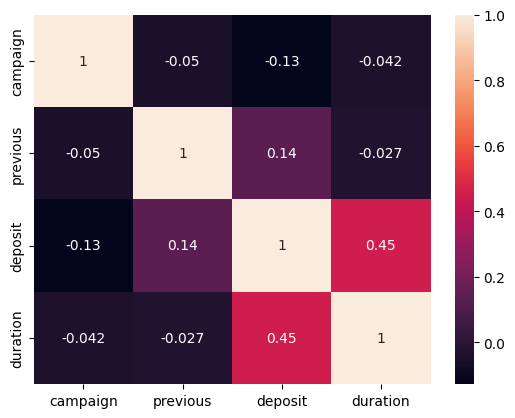

In [17]:
sns.heatmap(df_BANK_marketing[['campaign','previous','deposit','duration']].corr(), annot=True)

plt.show()

##### CORRELACIÓN DE SPEARMAN 

<Axes: xlabel='previous', ylabel='Count'>

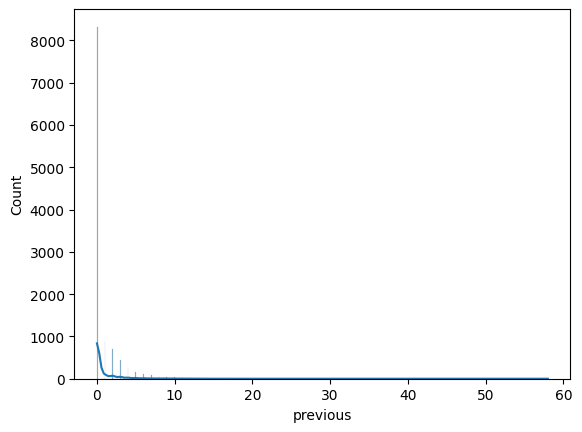

In [18]:
sns.histplot(df_BANK_marketing['previous'], kde=True)

<Axes: xlabel='campaign', ylabel='Count'>

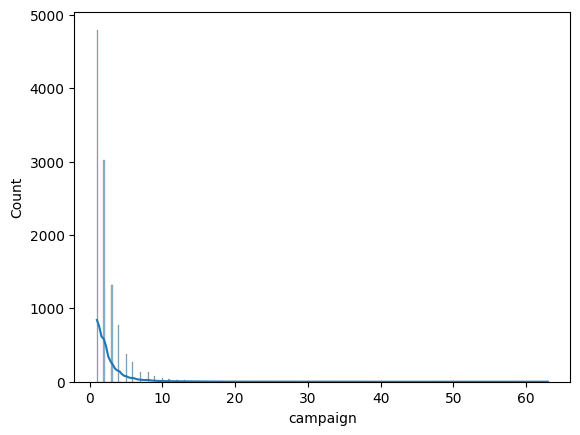

In [19]:
sns.histplot(df_BANK_marketing['campaign'], kde=True)

**Qué mide:**
*  Evalúa relaciones monótonas (crecientes o decrecientes) entre dos variables, incluso si no son lineales. Utiliza los rangos de los datos en lugar de los valores reales.

**Cuándo usarlo:**
* Las variables tienen una relación monótona no lineal. Por ejemplo, si el gráfico muestra una curva, pero sigue una tendencia general creciente o decreciente.
* Las **variables no tienen una distribución normal** (es más robusto ante distribuciones sesgadas).
* Hay **valores atípicos que podrían influir negativamente en la correlación de Pearson.**
* Datos ordinales, donde el orden importa, pero las diferencias entre valores no son significativas.

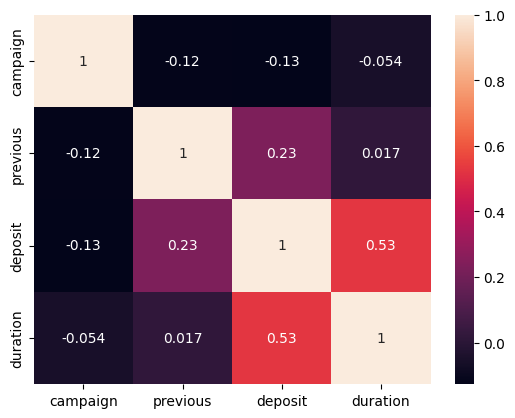

In [20]:
sns.heatmap(df_BANK_marketing[['campaign','previous','deposit','duration']].corr(method='spearman'), annot=True)

plt.show()

La segunda variable después de 'duration' que más influye en el resultado de la contratación de un depósito es 'previous' directamente proporcional con un coeficiente de spearman del **0.23**

#### TASA DE ÉXITO POR DURACIÓN DE LLAMADAS Y CANTIDAD DE LLAMADOS EN ANTERIORES CAMPAÑAS 'previous'

In [22]:
#Agrego columna 'Contacto' a cada dataframe
result_cellular['Contacto'] = 'cellular'
result_telephone['Contacto'] = 'telephone'

#Combino ambos dataframes: result_cellular y result_telephone
result_combined = pd.concat([result_cellular, result_telephone])

#Filtro por deposit = 1 y agrego columna 'previous' (Llamadas en campañas previas)
df_BANK_marketing_previous = df_BANK_marketing[
    (df_BANK_marketing['deposit'] == 1) & 
    (df_BANK_marketing['contact'].isin(['cellular', 'telephone']))
]

#Agrupo por 'contact', 'duration_min_range' y 'previous'
result_with_previous = (
    df_BANK_marketing_previous.groupby(['contact', 'duration_min_range', 'previous']).agg({'id': 'count'}).reset_index()
)

#Renombro columnas para que el df final sea más claro
result_with_previous.columns = ['Contacto', 'Duración de llamada', 'Llamadas en campañas previas', 'Contrató']

#Agrego columna de % de conversión agrupado por 'Contacto', 'uración de llamada' y 'Llamadas en campañas previas' / total de la población (sin 'unknown')
result_with_previous['% Conversión'] = round((result_with_previous['Contrató'] / total_poblacion_sin_unknown) * 100, 2)

#pd.set_option('display.max_rows', None)  #Muestra todas las filas

result_with_previous.sort_values('Contrató',ascending=False).head(10) #Ordeno por mayor cantidad contratados.

,Contacto,Duración de llamada,Llamadas en campañas previas,Contrató,% Conversión
20,cellular,05'- 10',0,795,9.02
0,cellular,00'- 05',0,790,8.96
38,cellular,10'- 15',0,562,6.37
52,cellular,15'- 20',0,272,3.09
1,cellular,00'- 05',1,254,2.88
2,cellular,00'- 05',2,199,2.26
21,cellular,05'- 10',1,176,2.00
22,cellular,05'- 10',2,138,1.57
64,cellular,20'- 25',0,126,1.43
3,cellular,00'- 05',3,120,1.36


## CONCLUSIÓN

1) ¿Cómo afecta la duración de las llamadas de contacto a la probabilidad de que un cliente suscriba a un depósito a plazo?
2) ¿Qué ajustes podríamos hacer en nuestros métodos de contacto para mejorar la tasa de respuesta?

Si nos enfocamos en los medios de contactos conocidos (movil y teléfono fijo) podemos afirmar que la mayor cantidad de llamadas se encuentran en un rango de 0 - 5' dónde en conjunto suman un 20.09% de éxito siendo el contacto por movil el favorito con un amplio **18.44%**
Si las llamadas duran entre 5 - 10' el conjunto de ambos métodos desciende hasta un 17.24% dónde el movil abarca un **15.63%** de éxito

Para ajustar la tasa de respuesta, hemos evaluado la cantidad de llamadas previas que se han hecho en anteriores campañas. Ahora bien, el estudio nos indicó que la mejor combinación para obtener la contratación de un depósito y reducir la cantidad de tiempo de un teleoperador, es llamar a clientes nuevos (que no hayan tenido contactos en campañas anteriores) a través de su movil e intentar persuadirlo en un período de 5 - 10' siendo efectivo en 795 por sobre 1285 intentos, dando como resultado una tasa de éxito de **9.02%**.